# Menganalisis Risiko Gagal Bayar Peminjam

Tugas Anda adalah menyiapkan laporan untuk divisi kredit suatu bank. Anda akan mencari tahu pengaruh status perkawinan seorang nasabah dan jumlah anak yang dimilikinya terhadap probabilitas gagal bayar dalam pelunasan pinjaman. Pihak bank sudah memiliki beberapa data mengenai kelayakan kredit nasabah.

Laporan Anda akan dipertimbangkan pada saat membuat **penilaian kredit** untuk calon nasabah. **Penilaian kredit** digunakan untuk mengevaluasi kemampuan calon peminjam untuk melunasi pinjaman mereka.

Dalam *notebook* ini, Anda dapat menemukan petunjuk dan instruksi singkat serta arahan untuk berfikir. Jangan abaikan petunjuk tersebut karena mereka dirancang untuk membekali Anda dengan struktur pengerjaan proyek dan akan membantu Anda menganalisis apa yang sedang Anda lakukan secara mendalam. Sebaliknya, buatlah agar laporan ini terlihat seolah-olah dikirimkan oleh Anda kepada rekan satu tim Anda untuk menunjukkan temuan Anda - mereka tidak perlu tahu bahwa Anda mendapatkan bantuan eksternal dari kami! Untuk membantu Anda, kami menempatkan semua petunjuk yang harus Anda hapus dalam tanda kurung siku.

Sebelum Anda masuk ke dalam analisis data Anda, jelaskan tujuan proyek dan hipotesis yang akan Anda uji.

## Buka *file* data dan baca informasi umumnya.

[Mulailah dengan mengimpor *library* dan memuat datanya. Anda mungkin akan menyadari bahwa Anda memerlukan *library* tambahan saat Anda telah mengerjakan proyek ini, dan itu merupakan hal yang normal. Hanya saja, pastikan untuk memperbarui bagian ini jika dibutuhkan.]

In [ ]:
# Muat semua *library*
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Muat datanya
df = pd.read_csv('/datasets/credit_scoring_eng.csv')


## Soal 1. Eksplorasi data

**Deskripsi Data**
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - pengidentifikasi untuk status perkawinan nasabah
- `family_status_id` - tanda pengenal status perkawinan
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah memiliki hutang pembayaran pinjaman
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman

Sekarang saatnya mengeksplor data kita. Anda perlu melihat berapa banyak kolom dan baris yang dimiliki oleh data, serta mencermati beberapa baris data untuk memeriksa potensi masalah dengan data.

In [ ]:
# Mari kita lihat berapa banyak baris dan kolom yang dimiliki oleh dataset kita
df.shape


(21525, 12)

In [ ]:
# Mari tampilkan N baris pertama
df.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


Jelaskan apa yang Anda lihat dan perhatikan dalam sampel data yang Anda tampilkan. Apakah terdapat masalah yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut?

Terdapat nilai negatif pada kolom (days_employed) akan diubah menjadi nilai positif
terdapat data yang terduplikasi pada kolom (education) akan disamakan semua data dengan metode lowercase

In [ ]:
# Dapatkan informasi data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Apakah terdapat nilai yang hilang di semua kolom atau hanya di beberapa kolom? Jelaskan secara singkat apa yang Anda amati dalam 1-2 kalimat.

Ya terdapat nilai yang hilang dari 2 kolom (days_employed) dan (total_income) 

In [ ]:
# Mari kita lihat tabel yang difilter dengan nilai yang hilang di kolom pertama yang mengandung data yang hilang
df.loc[df['days_employed'].isna()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


[Apakah nilai yang hilang tampak simetris? Apakah kita yakin dengan asumsi ini? Jelaskan pendapat Anda secara singkat di bagian ini. Anda mungkin ingin melakukan penyelidikan lebih lanjut, dan menghitung nilai yang hilang di semua baris dengan nilai yang hilang untuk memastikan bahwa sampel yang hilang memiliki ukuran yang sama.]

Nilai yang hilang simetris pada 2 kolom (days_employed) dan (total_income), untuk mengetahui dan memastikan bahwa data yang hilang memiliki ukuran yang sama menggunakan metode isna()

In [ ]:
# Mari kita terapkan beberapa kondisi untuk memfilter data dan melihat jumlah baris dalam tabel yang telah difilter.
df.isna().sum()


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [ ]:
round(df.isna().sum() / len(df) * 100,2)

children             0.0
days_employed       10.1
dob_years            0.0
education            0.0
education_id         0.0
family_status        0.0
family_status_id     0.0
gender               0.0
income_type          0.0
debt                 0.0
total_income        10.1
purpose              0.0
dtype: float64

**Kesimpulan sementara**

Apakah jumlah baris dalam tabel yang telah difilter sesuai dengan jumlah nilai yang hilang? Kesimpulan apa yang bisa kita buat dari hal ini?

Hitung persentase nilai yang hilang jika dibandingkan dengan keseluruhan *dataset*. Apakah nilai yang hilang merupakan bagian data yang cukup besar? Jika demikian, Anda sebaiknya perlu mengisi nilai yang hilang. Untuk melakukannya, pertama-tama kita harus mempertimbangkan apakah data yang hilang bisa jadi disebabkan oleh karakteristik nasabah tertentu, seperti jenis pekerjaan atau yang lainnya. Anda harus memutuskan karakteristik mana yang menurut *Anda* mungkin merupakan penyebabnya. Kedua, kita harus memeriksa apakah ada ketergantungan nilai yang hilang pada nilai indikator lain dengan kolom-kolom yang mengidentifikasikan karakteristik tertentu nasabah.

Jelaskan langkah Anda selanjutnya dan bagaimana hubungannya dengan kesimpulan yang Anda buat sejauh ini.

-Ya, Jumlah baris dalam tabel yang hilang sudah sesuai
-Persentase data yang hilang dari 2 kolom yaitu 10%
-Langkah selanjutnya yaitu, mengisi nilai yang hilang (days_employed) dan (total_income), kemudian menyamakan kategori dari kolom (education)

In [ ]:
# Mari kita periksa nasabah yang tidak memiliki data tentang karakteristik yang teridentifikasi dan kolom dengan nilai yang hilang
df_nan = df[(df['days_employed'].isna()) | (df['total_income'].isna())].reset_index(drop=True)
df_nan.shape

(2174, 12)

In [ ]:
# Periksalah distribusinya
df_nan['children'].value_counts(normalize=True)


 0     0.661914
 1     0.218491
 2     0.093836
 3     0.016559
 20    0.004140
 4     0.003220
-1     0.001380
 5     0.000460
Name: children, dtype: float64

In [ ]:
df_nan['family_status'].value_counts(normalize=True)

married              0.568997
civil partnership    0.203312
unmarried            0.132475
divorced             0.051518
widow / widower      0.043698
Name: family_status, dtype: float64

In [ ]:
df_nan['debt'].value_counts(normalize=True)

0    0.921803
1    0.078197
Name: debt, dtype: float64

Deksripsikan temuan Anda di sini.

**Kemungkinan penyebab hilangnya nilai dalam data**

Kemukakan gagasan Anda mengenai kemungkinan alasan hilangnya nilai-nilai tersebut. Apakah menurut Anda mereka hilang secara acak atau apakah terdapat pola-pola tertentu?

Mari kita mulai memeriksa apakah nilai yang hilang bersifat acak.

Penyebab hilangnya nilai dalam data dikarenakan bersifat random dan tidak terdapat pola tertentu

In [ ]:
# Memeriksa distribusi di seluruh *dataset*
df['children'].value_counts(normalize=True)


 0     0.657329
 1     0.223833
 2     0.095470
 3     0.015331
 20    0.003531
-1     0.002184
 4     0.001905
 5     0.000418
Name: children, dtype: float64

In [ ]:
df['family_status'].value_counts(normalize=True)

married              0.575145
civil partnership    0.194053
unmarried            0.130685
divorced             0.055517
widow / widower      0.044599
Name: family_status, dtype: float64

In [ ]:
df['debt'].value_counts(normalize=True)

0    0.919117
1    0.080883
Name: debt, dtype: float64

**Kesimpulan sementara**

Apakah distribusi dalam *dataset* yang asli mirip dengan distribusi tabel yang telah difilter? Apa artinya hal tersebut untuk kita?

Jika menurut Anda kita belum dapat membuat kesimpulan apa pun, mari kita kembali menyelidiki *dataset* lebih lanjut. Mari pikirkan alasan lain yang dapat menyebabkan data hilang dan periksa apakah kita dapat menemukan pola tertentu yang dapat membuat kita berpikir bahwa hilangnya nilai-nilai tersebut tidak terjadi secara acak. Karena ini merupakan tugas Anda, maka bagian ini adalah opsional.

Distribusi dalam dataset asli mirip dengan distribusi tabel yang telah difilter


In [ ]:
# Periksa penyebab dan pola lain yang dapat mengakibatkan nilai yang hilang
df_nan[df_nan['income_type']=='employee']['education'].value_counts(normalize=True)


secondary education    0.682353
bachelor's degree      0.190045
SECONDARY EDUCATION    0.031674
Secondary Education    0.028054
some college           0.025339
BACHELOR'S DEGREE      0.011765
Bachelor's Degree      0.011765
primary education      0.009955
SOME COLLEGE           0.004525
Some College           0.003620
PRIMARY EDUCATION      0.000905
Name: education, dtype: float64

In [ ]:
df[df['income_type']=='employee']['education'].value_counts(normalize=True)

secondary education    0.669934
bachelor's degree      0.188146
SECONDARY EDUCATION    0.039572
Secondary Education    0.033366
some college           0.029319
primary education      0.012141
BACHELOR'S DEGREE      0.011332
Bachelor's Degree      0.011062
Some College           0.002338
SOME COLLEGE           0.001619
PRIMARY EDUCATION      0.000540
Primary Education      0.000360
graduate degree        0.000180
GRADUATE DEGREE        0.000090
Name: education, dtype: float64

**Kesimpulan sementara**

Apakah pada akhirnya kita dapat memastikan bahwa nilai yang hilang adalah suatu kebetulan? Periksa hal lain yang menurut Anda penting di sini.

Beberapa nilai yang hilang bukan suatu kebetulan, melainkan ada penyebabnya diantaranya kesalahan penginputan pada kolom [children], banyak nilai yang terduplikasi pada kolom [education].

In [ ]:
# Periksa pola lainnya - jelaskan pola tersebut
df_nan[df_nan['income_type']=='employee']['family_status'].value_counts(normalize=True)

married              0.590950
civil partnership    0.203620
unmarried            0.130317
divorced             0.051584
widow / widower      0.023529
Name: family_status, dtype: float64

**Kesimpulan**

Apakah Anda menemukan suatu pola? Bagaimana Anda mendapatkan kesimpulan ini?

Jelaskan bagaimana Anda akan mengatasi nilai-nilai yang hilang. Pertimbangkan kategori dengan nilai yang hilang.

Rencanakan secara singkat langkah Anda selanjutnya untuk mentransformasi data. Anda mungkin perlu mengatasi berbagai jenis masalah: duplikat, pencatatan yang berbeda, sumber data yang salah, dan nilai yang hilang.

Tidak menemukan suatu pola, dapat disimpulkan nilai yang hilang terjadi secara acak

## Transformasi data

Mari kita perhatikan setiap kolom untuk melihat masalah apa yang mungkin dimiliki mereka.

Mulailah dengan menghapus duplikat dan memperbaiki data tentang informasi pendidikan jika diperlukan.

In [ ]:
df.duplicated().sum()

54

In [ ]:
df_new = df.drop_duplicates().reset_index(drop=True)
df_new.duplicated().sum()

0

In [ ]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki
df_new['education'].value_counts()

secondary education    13705
bachelor's degree       4710
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        273
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [ ]:
# Perbaiki pencatatan jika diperlukan
df_new['education'] = df_new['education'].str.lower()

In [ ]:
# Periksa semua nilai di kolom untuk memastikan bahwa kita telah memperbaikinya dengan tepat
df_new['education'].value_counts()


secondary education    15188
bachelor's degree       5251
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

Periksa data kolom `children`

In [ ]:
# Mari kita lihat distribusi nilai pada kolom `children`
df_new['children'].value_counts()

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Apakah terdapat hal-hal yang aneh di kolom tersebut? Bagaimana mereka bisa terjadi? Buat keputusan tentang apa yang akan Anda lakukan dengan data ini dan jelaskan alasannya.

Terdapat nilai yang minus, kemungkinan salah input, mengubah nilai minus menjadi positif (1)

In [ ]:
# [perbaiki data berdasarkan keputusan Anda]
df_new['children'] = df_new['children'].replace(-1, 1)

In [ ]:
# Periksa kembali kolom `children` untuk memastikan bahwa semuanya telah diperbaiki
df_new['children'].value_counts()


0     14107
1      4856
2      2052
3       330
20       76
4        41
5         9
Name: children, dtype: int64

Periksa data dalam kolom the `days_employed`. Pertama-tama pikirkan tentang masalah apa yang mungkin ada pada kolom tersebut, serta pikirkan juga apa yang mungkin ingin Anda periksa dan bagaimana Anda akan melakukannya.

In [ ]:
# Temukan data yang bermasalah di `days_employed`, jika memang terdapat masalah, dan hitung persentasenya
df_new['days_employed'].value_counts()

-327.685916     1
-1580.622577    1
-4122.460569    1
-2828.237691    1
-2636.090517    1
               ..
-7120.517564    1
-2146.884040    1
-881.454684     1
-794.666350     1
-3382.113891    1
Name: days_employed, Length: 19351, dtype: int64

Jika jumlah data yang bermasalah tinggi, hal tersebut mungkin disebabkan oleh beberapa masalah teknis. Kami mungkin perlu mengusulkan alasan paling jelas mengapa hal tersebut dapat terjadi dan bagaimana seharusnya data yang benar, mengingat kita tidak dapat menghapus baris yang bermasalah ini.

In [ ]:
# Atasi nilai yang bermasalah, jika ada
df_new['days_employed'] = df_new['days_employed'].abs()


In [ ]:
df_new.loc[df_new['days_employed'] > 20000, 'days_employed'] = (df_new['dob_years'] - 19) * 365

In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df_new['days_employed'] / 365

0        23.116912
1        11.026860
2        15.406637
3        11.300677
4        34.000000
           ...    
21466    12.409087
21467    48.000000
21468     5.789991
21469     8.527347
21470     5.437007
Name: days_employed, Length: 21471, dtype: float64

Sekarang mari kita lihat usia nasabah dan mengecek apakah terdapat masalah di sana. Sekali lagi, pikirkan tentang kemungkinan kejanggalan apa yang bisa kita temui dalam kolom ini, misalnya angka usia yang tidak masuk akal.

In [ ]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
df_new['dob_years'].value_counts()


35    616
40    607
41    606
34    601
38    597
42    596
33    581
39    572
31    559
36    554
44    545
29    544
30    538
48    537
37    536
50    513
43    512
32    509
49    508
28    503
45    497
27    493
52    484
56    484
47    477
54    476
46    473
53    459
57    456
58    456
51    448
59    443
55    443
26    408
60    374
25    357
61    354
62    349
63    269
24    264
64    262
23    253
65    194
22    183
66    182
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [ ]:
sorted(df_new['dob_years'].unique())

[0,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

Putuskan apa yang akan Anda lakukan dengan nilai yang bermasalah dan jelaskan alasannya.

In [ ]:
# Atasi masalah pada kolom `dob_years`, jika terdapat masalah
df_new1 = df_new[df_new['dob_years']!= 0].reset_index(drop=True)

In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
sorted(df_new1['dob_years'].unique())

[19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

Sekarang saatnya memeriksa kolom `family_status`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi.

In [ ]:
# Mari kita lihat nilai untuk kolom ini
df_new1['family_status'].value_counts()


married              12295
civil partnership     4142
unmarried             2794
divorced              1185
widow / widower        954
Name: family_status, dtype: int64

In [ ]:
# Atasi nilai yang bermasalah di `family_status`, jika ada



In [ ]:
# Periksa hasilnya - pastikan nilainya telah diperbaiki


Sekarang saatnya memeriksa kolom `gender`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi

In [ ]:
# Mari kita liat nilai dalam kolom ini
df_new1['gender'].value_counts()

F      14117
M       7252
XNA        1
Name: gender, dtype: int64

In [ ]:
drop_index = df_new1[df_new1['gender']=='XNA'].index

In [ ]:
# Atasi nilai-nilai yang bermasalah, jika ada
df_new2 = df_new1.drop(drop_index).reset_index(drop=True)

In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df_new2['gender'].value_counts()


F    14117
M     7252
Name: gender, dtype: int64

Sekarang saatnya memeriksa kolom `income_type`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi

In [ ]:
# Mari kita lihat nilai dalam kolom ini
df_new2['income_type'].value_counts()

employee                       11036
business                        5059
retiree                         3817
civil servant                   1451
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [ ]:
# Atasi nilai yang bermasalah, jika ada

In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki



Sekarang saatnya melihat apakah ada duplikat di dalam data kita. Jika kita menemukannya, Anda harus memutuskan apa yang akan Anda lakukan dengan duplikat tersebut dan menjelaskan alasannya.

In [ ]:
# Periksa duplikat
df_new2.duplicated().sum()


17

In [ ]:
# Atasi duplikat, jika ada
df_new2 = df_new2.drop_duplicates().reset_index(drop=True)


In [ ]:
# Lakukan pemeriksaan terakhir untuk mengecek apakah kita memiliki duplikat
df_new2.duplicated().sum()

0

In [ ]:
# Periksa ukuran dataset yang sekarang Anda miliki setelah manipulasi pertama yang Anda lakukan
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21352 non-null  int64  
 1   days_employed     19259 non-null  float64
 2   dob_years         21352 non-null  int64  
 3   education         21352 non-null  object 
 4   education_id      21352 non-null  int64  
 5   family_status     21352 non-null  object 
 6   family_status_id  21352 non-null  int64  
 7   gender            21352 non-null  object 
 8   income_type       21352 non-null  object 
 9   debt              21352 non-null  int64  
 10  total_income      19259 non-null  float64
 11  purpose           21352 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Jelaskan *dataset* baru Anda: jelaskan secara singkat apa saja perubahannya dan seberapa besar persentase perubahannya, jika ada.


# Bekerja dengan nilai yang hilang

Untuk mempercepat pekerjaan dengan sejumlah data, Anda mungkin ingin menggunakan *dictionary* untuk beberapa nilai yang memiliki ID. Jelaskan mengapa dan *dictionary* apakah yang akan Anda gunakan.

In [ ]:
# Temukan dictionary
dict_edu = df_new2[['education_id','education']].drop_duplicates().reset_index(drop=True)

In [ ]:
dict_edu.to_dict(orient='records')

[{'education_id': 0, 'education': "bachelor's degree"},
 {'education_id': 1, 'education': 'secondary education'},
 {'education_id': 2, 'education': 'some college'},
 {'education_id': 3, 'education': 'primary education'},
 {'education_id': 4, 'education': 'graduate degree'}]

In [ ]:
dict_fam = df_new2[['family_status_id','family_status']].drop_duplicates().reset_index(drop=True)

In [ ]:
dict_fam.to_dict(orient='records')

[{'family_status_id': 0, 'family_status': 'married'},
 {'family_status_id': 1, 'family_status': 'civil partnership'},
 {'family_status_id': 2, 'family_status': 'widow / widower'},
 {'family_status_id': 3, 'family_status': 'divorced'},
 {'family_status_id': 4, 'family_status': 'unmarried'}]

### Memperbaiki nilai yang hilang di `total_income`

Jelaskan secara singkat kolom dengan nilai yang hilang manakah yang perlu Anda tangani. Jelaskan bagaimana Anda akan memperbaikinya.


Mulailah dengan mengatasi total nilai pendapatan yang hilang. Buatlah kategori usia untuk nasabah. Buatlah kolom baru yang memuat kategori usia. Strategi ini dapat membantu untuk menghitung total nilai pendapatan.


In [ ]:
# Mari kita tulis sebuah fungsi untuk menghitung kategori usia
def age_category(age):
    try:
        if age <= 17:
            return 'teenager'
        elif 18 <= age <= 30:
            return 'young'
        elif 31 <= age <= 50:
            return 'mature'
        else:
            return 'old age'
    except:
        return 'unknown'

In [ ]:
# Lakukan pengujian untuk melihat apakah fungsi Anda bekerja atau tidak
age_category(36)


'mature'

In [ ]:
# Buatlah kolom baru berdasarkan fungsi
df_new2['age_category'] = df_new2['dob_years'].apply(age_category) 


In [ ]:
# Periksa bagaimana nilai di dalam kolom baru
df_new2['age_category'].value_counts()


mature     10992
old age     6644
young       3716
Name: age_category, dtype: int64

Pikirkan tentang faktor-faktor yang biasanya bergantung pada pendapatan. Pada akhirnya, Anda akan mengetahui apakah Anda harus menggunakan nilai rata-rata atau median untuk mengganti nilai yang hilang. Untuk membuat keputusan ini, Anda mungkin ingin melihat distribusi faktor-faktor yang Anda identifikasi sebagai dampak dari pendapatan seseorang.

Buatlah tabel yang hanya memuat data tanpa nilai yang hilang. Data ini akan digunakan untuk memperbaiki nilai yang hilang.

In [ ]:
# Buat tabel tanpa nilai yang hilang dan tampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
df_not_na = df_new2[df_new2['total_income'].notna()].reset_index(drop=True)

In [ ]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
df_not_na.groupby('age_category')['total_income'].mean()

age_category
mature     28383.188755
old age    24704.150073
young      25815.651899
Name: total_income, dtype: float64

In [ ]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
df_not_na.groupby('age_category')['total_income'].median()

age_category
mature     24711.8435
old age    21310.9445
young      22955.4740
Name: total_income, dtype: float64

Ulangi perbandingan tersebut untuk beberapa faktor. Pastikan Anda mempertimbangkan berbagai aspek dan menjelaskan proses berpikir Anda.



Buatlah keputusan tentang karakteristik yang paling menentukan pendapatan dan apakah Anda akan menggunakan median atau rata-rata. Jelaskan mengapa Anda membuat keputusan ini


In [ ]:
#  Tulis fungsi yang akan kita gunakan untuk mengisi nilai yang hilang
def fill_missing_value (dataframe, agg_column, value_column):
    
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe
        

In [ ]:
# Memeriksa bagaimana nilai di dalam kolom baru
df_new3 = fill_missing_value(df_new2, 'age_category', 'total_income')

In [ ]:
df_new3.isna().sum()

children               0
days_employed       2093
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
age_category           0
dtype: int64

In [ ]:
# Terapkan fungsi tersebut ke setiap baris
df_new3.groupby('age_category')['total_income'].median()

age_category
mature     24711.8435
old age    21310.9445
young      22955.4740
Name: total_income, dtype: float64

In [ ]:
# Periksa apakah kita mendapatkan kesalahan
df_new3[df_new3['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category


Jika Anda menemukan kesalahan dalam menyiapkan nilai untuk data yang hilang, mungkin berarti ada sesuatu yang istimewa tentang data untuk kategori tersebut. Mari pikirkan - Anda mungkin ingin memperbaiki beberapa hal secara manual, jika terdapat cukup data untuk menemukan median/rata-rata.


In [ ]:
# Ganti nilai yang hilang jika terdapat kesalahan


Setelah Anda selesai dengan `total_income`, periksa apakah jumlah total nilai di kolom ini sesuai dengan jumlah nilai di kolom lain.

In [ ]:
# Periksa jumlah entri di kolom
df_new3.isna().sum()


children               0
days_employed       2093
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
age_category           0
dtype: int64

###  Memperbaiki nilai di `days_employed`

Pikirkan tentang parameter yang dapat membantu Anda memperbaiki nilai yang hilang di kolom ini. Pada akhirnya, Anda akan mengetahui apakah Anda harus menggunakan nilai rata-rata atau median untuk mengganti nilai yang hilang. Anda mungkin perlu melakukan penelitian yang sama dengan yang Anda lakukan saat memperbaiki data di kolom sebelumnya.

In [ ]:
# Distribusi median dari `days_employed` berdasarkan parameter yang Anda identifikasi
df_not_na.groupby('age_category')['days_employed'].median()


age_category
mature      1865.986695
old age    12775.000000
young       1045.752744
Name: days_employed, dtype: float64

In [ ]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang Anda identifikasi
df_not_na.groupby('age_category')['days_employed'].mean()


age_category
mature     2590.939643
old age    9682.897654
young      1282.123623
Name: days_employed, dtype: float64

Tentukan apa yang akan Anda gunakan: rata-rata atau median. Jelaskan mengapa.

menggunakan median karena memiliki banyak outliers

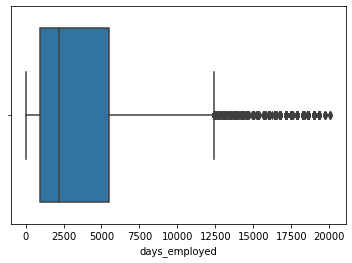

In [ ]:
sns.boxplot(df_not_na['days_employed']);

In [ ]:
# Mari tulis fungsi yang menghitung rata-rata atau median (tergantung keputusan Anda) berdasarkan parameter yang Anda identifikasi
def test (dataframe, grouping_column, target_column):
    unique_vals = dataframe[grouping_column].unique()

    for value in unique_vals:
        # median
        median = dataframe.loc[dataframe[grouping_column]==value, target_column].median()
        dataframe.loc[(dataframe[grouping_column]==value) & (dataframe[target_column].isna()), target_column] = median
    
    return dataframe

In [ ]:
# Periksa apakah fungsi Anda dapat bekerja
df_new4 = test(df_new3,'age_category','days_employed')


In [ ]:
df_new4.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_category        0
dtype: int64

In [ ]:
# Terapkan fungsi ke income_type
df_new5 = test(df_new4,'income_type','days_employed')


In [ ]:
# Periksa apakah fungsi Anda bekerja
df_new5[df_new5['income_type'].isna()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category


In [ ]:
# Ganti nilai yang hilang



Setelah Anda selesai dengan `total_income`, periksa apakah jumlah total nilai di kolom ini sesuai dengan jumlah nilai di kolom lain.

In [ ]:
# Periksa entri di semua kolom - pastikan kita memperbaiki semua nilai yang hilang


## Pengkategorian Data

Untuk menjawab pertanyaan dan menguji hipotesis, Anda akan bekerja dengan data yang telah dikategorikan. Lihatlah pertanyaan-pertanyaan yang diajukan kepada Anda dan yang harus Anda jawab. Pikirkan tentang data mana yang perlu dikategorikan untuk menjawab pertanyaan-pertanyaan ini. Di bawah ini, Anda akan menemukan templat yang bisa Anda gunakan untuk mengkategorikan data. Proses pertama mencakup data teks; yang kedua membahas data numerik yang perlu dikategorikan. Anda dapat menggunakan kedua petunjuk yang disarankan atau tidak sama sekali - semuanya terserah Anda.

Terlepas dari keputusan Anda untuk mengatasi pengkategorian, pastikan bahwa Anda secara lugas memberikan penjelasan tentang mengapa Anda membuat keputusan tersebut. Ingat: ini adalah pekerjaan Anda dan Andalah yang berhak membuat segala keputusan.


In [ ]:
df_new5.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,mature
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,mature
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,mature
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,mature
4,0,12410.000000,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,old age


In [ ]:
# Tampilkan nilai data yang Anda pilih untuk pengkategorian
selected_column = ['education','gender','family_status']


In [ ]:
for i in selected_column:
    print(i)
    print(df_new5[i].unique())
    print()

education
["bachelor's degree" 'secondary education' 'some college'
 'primary education' 'graduate degree']

gender
['F' 'M']

family_status
['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']



Mari kita memeriksa nilai unik

In [ ]:
# Periksa nilai unik
df_new5['purpose'].value_counts()

wedding ceremony                            786
having a wedding                            764
to have a wedding                           760
real estate transactions                    672
buy commercial real estate                  658
buying property for renting out             649
transactions with commercial real estate    648
housing transactions                        646
purchase of the house                       640
housing                                     640
purchase of the house for my family         637
construction of own property                633
property                                    629
transactions with my real estate            627
building a real estate                      621
purchase of my own house                    619
building a property                         619
buy real estate                             617
housing renovation                          605
buy residential real estate                 603
buying my own car                       

In [ ]:
def purpose_category(row):
    if 'car' in row:
        return 'car'
    elif 'hous' in row or 'propert' in row or 'real esta' in row:
        return 'property'
    elif 'wedd' in row:
        return 'wedding'
    elif 'educ' in row or 'uni' in row:
        return 'education'
    else:
        return 'unidentified'

In [ ]:
df_new5['purpose_category'] = df_new5['purpose'].apply(purpose_category)

In [ ]:
df_new5.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,purpose_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,mature,property
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,mature,car
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,mature,property
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,mature,education
4,0,12410.000000,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,old age,wedding


Kelompok utama apakah yang dapat Anda identifikasi berdasarkan nilai uniknya?

Kita akan mengkategorikan data kita berdasarkan topik ini.


In [ ]:
# Mari kita tulis sebuah fungsi untuk mengategorikan data berdasarkan topik umum
def replace_debt(value):
    if value == 1:
        return 'have a loan'
    else:
        return 'do not have a loan'


In [ ]:
# Buat kolom yang memuat kategori dan hitung nilainya
df_new5['debt_category'] = df_new5['debt'].apply(replace_debt)


Jika Anda memutuskan untuk mengategorikan data numerik, Anda juga harus membuat kategori untuk data tersebut.

In [ ]:
# Lihat semua data numerik di kolom yang Anda pilih untuk pengkategorian
selected_num_column = ['dob_years', 'days_employed']
df_new5.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,purpose_category,debt_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,mature,property,do not have a loan
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,mature,car,do not have a loan
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,mature,property,do not have a loan
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,mature,education,do not have a loan
4,0,12410.000000,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,old age,wedding,do not have a loan


In [ ]:
# Dapatkan kesimpulan statistik untuk kolomnya
df_new5[selected_num_column].describe()


,dob_years,days_employed
count,21352.000000,21352.000000
mean,43.476817,4627.389144
std,12.241877,5270.861940
min,19.000000,24.141633
25%,33.000000,1023.725461
50%,43.000000,2043.850216
75%,53.000000,5791.623325
max,75.000000,20075.000000


Tentukan rentang apa yang akan Anda gunakan untuk pengelompokan dan jelaskan alasannya.

In [ ]:
# Buat fungsi yang melakukan pengkategorian menjadi kelompok numerik yang berbeda berdasarkan rentang
def income_level(income):
    if (income > 5000) and (income <= 10000):
        return 'low income'
    if (income > 10000) and (income <= 15000):
        return 'lower middle income'
    if (income > 20000) and (income <= 25000):
        return 'upper middle income'
    if (income > 25000) and (income <= 50000):
        return 'high income'
    if income > 50000:
        return 'unknown'


In [ ]:
# Buat kolom yang memuat kategori
df_new5['income_level'] = df_new5['total_income'].apply(income_level)
df_new5.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,purpose_category,debt_category,income_level
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,mature,property,do not have a loan,high income
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,mature,car,do not have a loan,None
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,mature,property,do not have a loan,upper middle income
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,mature,education,do not have a loan,high income
4,0,12410.000000,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,old age,wedding,do not have a loan,high income


In [ ]:
df_new5['income_level'].value_counts()

high income            7241
upper middle income    5461
lower middle income    2802
unknown                1318
low income              895
Name: income_level, dtype: int64

In [ ]:
# Hitung setiap nilai kategori untuk melihat pendistribusiannya
for i in selected_column:
    print(df_new5[i].value_counts())
    print()

secondary education    15108
bachelor's degree       5215
some college             741
primary education        282
graduate degree            6
Name: education, dtype: int64

F    14102
M     7250
Name: gender, dtype: int64

married              12290
civil partnership     4129
unmarried             2794
divorced              1185
widow / widower        954
Name: family_status, dtype: int64



In [ ]:
df_new5['children'].value_counts()

0     14021
1      4839
2      2039
3       328
20       75
4        41
5         9
Name: children, dtype: int64

In [ ]:
df_new5['education'].value_counts()

secondary education    15108
bachelor's degree       5215
some college             741
primary education        282
graduate degree            6
Name: education, dtype: int64

## Memeriksa hipotesis


**Apakah terdapat korelasi antara memiliki anak dengan melakukan pelunasan tepat waktu?**

terdapat korelasi antara memiliki anak dengan pelunasan pinjaman tepat waktu

In [ ]:
# Periksa data anak dan data pelunasan tepat waktu
print(df_new5[['children','debt']])


       children  debt
0             1     0
1             1     0
2             0     0
3             3     0
4             0     0
...         ...   ...
21347         1     0
21348         0     0
21349         1     1
21350         3     1
21351         2     0

[21352 rows x 2 columns]


In [ ]:
# Hitung gagal bayar berdasarkan jumlah anak
pivot_children = pd.pivot_table(df_new5, index='children', columns='debt', values='education', aggfunc='count')
pivot_children.reset_index(inplace=True)
pivot_children['percentage'] = round(pivot_children[1]/(pivot_children[0]+pivot_children[1])*100,1)
pivot_children


debt,children,0,1,percentage
0,0,12963.0,1058.0,7.5
1,1,4397.0,442.0,9.1
2,2,1845.0,194.0,9.5
3,3,301.0,27.0,8.2
4,4,37.0,4.0,9.8
5,5,9.0,NaN,NaN
6,20,67.0,8.0,10.7


**Kesimpulan**

semakin banyak anak semakin tinggi persentase keterlambatan atau gagal bayar dalam pelunasan pinjaman tepat waktu, karena didasari kebutuhan untuk anak.


**Apakah terdapat korelasi antara status keluarga dengan pelunasan tepat waktu?**

terdapat korelasi antara status keluarga dengan pelunasan tepat waktu

In [ ]:
# Periksa data status keluarga dan pelunasan tepat waktu
print(df_new5[['family_status','debt']])


           family_status  debt
0                married     0
1                married     0
2                married     0
3                married     0
4      civil partnership     0
...                  ...   ...
21347  civil partnership     0
21348            married     0
21349  civil partnership     1
21350            married     1
21351            married     0

[21352 rows x 2 columns]


In [ ]:
# Hitung gagal bayar berdasarkan status keluarga
pivot_family_status = pd.pivot_table(df_new5, index='family_status', columns='debt', values='education', aggfunc='count')
pivot_family_status.reset_index(inplace=True)
pivot_family_status['percentage'] = round(pivot_family_status[1]/(pivot_family_status[0]+pivot_family_status[1])*100,1)
pivot_family_status

debt,family_status,0,1,percentage
0,civil partnership,3743,386,9.3
1,divorced,1100,85,7.2
2,married,11363,927,7.5
3,unmarried,2521,273,9.8
4,widow / widower,892,62,6.5


**Kesimpulan**

status keluarga seseorang berpengaruh secara signifikan terhadap motivasi dalam melunasi pinjaman tepat waktu karena didasari oleh kebutuhan antara yang telah berkeluarga dan belum.


**Apakah terdapat korelasi antara tingkat pendapatan dengan membayar kembali tepat waktu?**

tidak terdapat korelasi antara tingkat pendapatan dengan membayar kembali tepat waktu

In [ ]:
# Periksa data tingkat pendapatan dan pelunasan tepat waktu
print(df_new5[['income_level','debt']])


              income_level  debt
0              high income     0
1                     None     0
2      upper middle income     0
3              high income     0
4              high income     0
...                    ...   ...
21347          high income     0
21348  upper middle income     0
21349  lower middle income     1
21350          high income     1
21351  lower middle income     0

[21352 rows x 2 columns]


In [ ]:
# Hitung gagal bayar berdasarkan tingkat pendapatan
pivot_income_level = pd.pivot_table(df_new5, index='income_level', columns='debt', values='education', aggfunc='count')
pivot_income_level.reset_index(inplace=True)
pivot_income_level['percentage'] = round(pivot_income_level[1]/(pivot_income_level[0]+pivot_income_level[1])*100,1)
pivot_income_level


debt,income_level,0,1,percentage
0,high income,6661,580,8.0
1,low income,839,56,6.3
2,lower middle income,2563,239,8.5
3,unknown,1226,92,7.0
4,upper middle income,5005,456,8.4


**Kesimpulan**

tingkat pendapatan tidak berpengaruh secara signifikan terhadap dalam membayar pinjaman, ini dibuktikan orang yang ada pada level pendapatan menengah ke bawah paling tinggi mengalami kemungkinan gagal bayar, sedangkan orang pada level pendapatan paling rendah memiliki tingkat kemungkinan gagal bayar terendah diantara semuanya.

**Bagaimana tujuan kredit memengaruhi tingkat gagal bayar?**

tujuan kredit sangat mempengaruhi tingkat gagal bayar dikarenakan tujuannya terkadang tidak sesuai antara kondisi pendapatan dan keinginan.

In [ ]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan
df_new5.purpose.unique()
df_new5.loc[df_new5['purpose'].isin(['buy car', 'car purchase', 'buying a second-hand car', 'cars', 'car', 'to own a car', 'second-hand car purchase', 'buying my own car', 'purchase of a car', 'to buy a car' ]), 'purpose'] = 'to buy car'
df_new5.loc[df_new5['purpose'].isin(['to have a wedding', 'having a wedding', 'wedding ceremony']), 'purpose'] = 'to have wedding'
df_new5.loc[df_new5['purpose'].isin(['buy real estate', 'buy commercial real estate', 'buy residential real estate', 'transactions with commercial real estate', 'building a real estate', 'transactions with my real estate', 'real estate transactions']), 'purpose'] = 'to buy real estate'
df_new5.loc[df_new5['purpose'].isin(['going to university', 'university education', 'profile education', 'supplementary education', 'to become educated', 'getting an education', 'to get a supplementary education', 'getting higher education', 'education']), 'purpose'] = 'to get education'
df_new5.loc[df_new5['purpose'].isin(['purchase of the house', 'housing transactions', 'purchase of the house for my family', 'housing', 'purchase of my own house', 'housing renovation']), 'purpose'] = 'to buy house'
df_new5.loc[df_new5['purpose'].isin(['construction of own property', 'property', 'building a property', 'buying property for renting out']), 'purpose'] = 'to buy property'

df_new5.purpose.unique()


array(['to buy house', 'to buy car', 'to get education',
       'to have wedding', 'to buy real estate', 'to buy property'],
      dtype=object)

In [ ]:
print(df_new5[['purpose','debt']])

                purpose  debt
0          to buy house     0
1            to buy car     0
2          to buy house     0
3      to get education     0
4       to have wedding     0
...                 ...   ...
21347      to buy house     0
21348        to buy car     0
21349   to buy property     1
21350        to buy car     1
21351        to buy car     0

[21352 rows x 2 columns]


In [ ]:
pivot_purpose = pd.pivot_table(df_new5, index='purpose', columns='debt', values='education', aggfunc='count')
pivot_purpose.reset_index(inplace=True)
pivot_purpose['percentage'] = round(pivot_purpose[1]/(pivot_purpose[0]+pivot_purpose[1])*100,1)
pivot_purpose

debt,purpose,0,1,percentage
0,to buy car,3884,400,9.3
1,to buy house,3533,254,6.7
2,to buy property,2341,189,7.5
3,to buy real estate,4110,336,7.6
4,to get education,3625,370,9.3
5,to have wedding,2126,184,8.0


**Kesimpulan**

tujuan kredit yang mempengaruhi tingkat gagal bayar tertinggi adalah untuk membeli mobil dan yang terendah adalah untuk membeli rumah


# Kesimpulan umum 




Setelah melakukan analisa resiko gagal bayar peminjaman terdapat beberapa kesimpulan: 
1.	Bahwa terdapat korelasi status perkawinan, jumlah anak yang dimiliki seorang nasabah terhadap probabilitas gagal bayar dalam pelunasan pinjaman. Status keluarga seseorang berpengaruh secara signifikan terhadap motivasi dalam melunasi pinjaman tepat waktu, serta semakin banyak anak semakin tinggi persentase keterlambatan atau gagal bayar dalam pelunasan pinjaman tepat waktu, karena didasari kebutuhan untuk anak. Sedangkan tingkat pendapatan tidak berpengaruh secara signifikan terhadap dalam membayar pinjaman, ini dibuktikan nasabah yang ada pada level pendapatan menengah ke bawah paling tinggi mengalami kemungkinan gagal bayar, sedangkan nasabah pada level pendapatan paling rendah memiliki tingkat kemungkinan gagal bayar terendah diantara semuanya. Tujuan kredit sangat mempengaruhi tingkat gagal bayar dikarenakan tujuannya terkadang tidak sesuai antara pendapatan dan keinginan.
2.	Terkait nilai yang hilang, terdapat nilai yang hilang simetris dari 2 kolom [days_employed] dan [total_income], untuk mengetahui dan memastikan bahwa data yang hilang memiliki ukuran yang sama menggunakan metode <isna()>. Jumlah baris dalam tabel yang hilang sudah sesuai dan persentase data yang hilang dari 2 kolom tersebut sebesar 10%. 
Terdapat juga nilai negatif pada kolom [days_employed] data ini juga akan diubah menjadi nilai positif. Selain itu terdapat juga data yang terduplikasi pada kolom [education] maka perlu disamakan semua data yang terduplikasi tersebut dengan metode <lower()>. Kemudian mengisi nilai yang hilang dari [days_employed] dan [total_income], selanjutnya menyamakan kategorinya dari kolom [education].
Penyebab hilangnya nilai dalam data dikarenakan bersifat random dan tidak terdapat pola tertentu, beberapa nilai yang hilang bukan suatu kebetulan, melainkan ada penyebabnya diantaranya kesalahan penginputan pada kolom [children], banyak nilai yang terduplikasi pada kolom [education].
